(540, 2500) (540,)


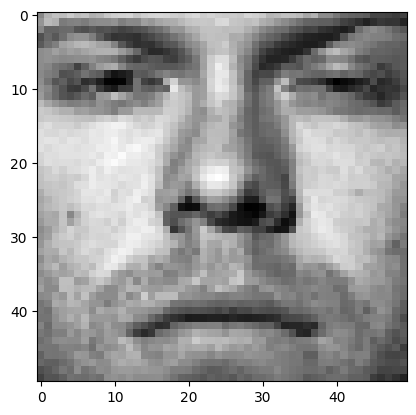

(100, 2500) (100,)


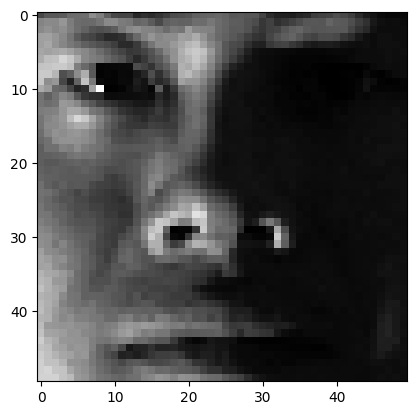

In [2]:
import numpy as np
# from scipy import misc <- deprecated
from imageio.v2 import imread
from matplotlib import pylab as plt
import matplotlib.cm as cm
%matplotlib inline

# Loading the train dataset into matrix 'train_data' (the X in the problem description)
train_labels, train_data = [], []
for line in open('./faces/train.txt'):
    im = imread(line.strip().split()[0])
    train_data.append(im.reshape(2500,))
    train_labels.append(line.strip().split()[1])
train_data, train_labels = np.array(train_data, dtype=float), np.array(train_labels, dtype=int)

# Loading the test dataset into matrix 'test_data' (the X_test in the problem description)
test_labels, test_data = [], []
for line in open('./faces/test.txt'):
    im = imread(line.strip().split()[0])
    test_data.append(im.reshape(2500,))
    test_labels.append(line.strip().split()[1])
test_data, test_labels = np.array(test_data, dtype=float), np.array(test_labels, dtype=int)

# Displaying dimensions of the train dataset and displaying the 10th image
print (train_data.shape, train_labels.shape)
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

# Displaying dimensions of the test dataset and displaying the 10th image
print (test_data.shape, test_labels.shape)
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

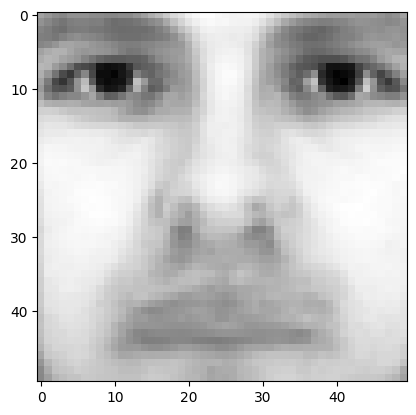

In [3]:
# Computing the average face of the training dataset
average_face = np.zeros(train_data.shape[1]) # Create an array of zeros of the same size as the images (2500)
for i in train_data:
    average_face += i
average_face = average_face / len(train_data)
plt.imshow(average_face.reshape(50, 50), cmap = cm.Greys_r)
plt.show()

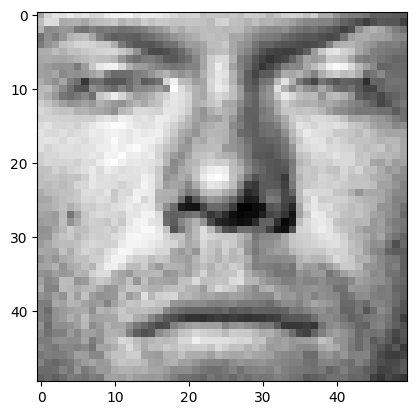

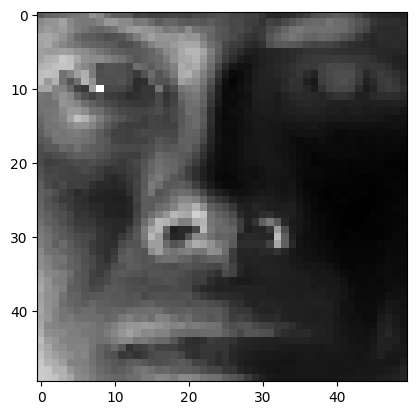

In [4]:
# Subtracting mean face from the training and test datasets
for i in range(len(train_data)):
    train_data[i] -= average_face

for i in range(len(test_data)):
    test_data[i] -= average_face

# Displaying the 10th image of the training dataset after subtracting the mean face
plt.imshow(train_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

# Displaying the 10th image of the testing dataset after subtracting the mean face
plt.imshow(test_data[10, :].reshape(50,50), cmap = cm.Greys_r)
plt.show()

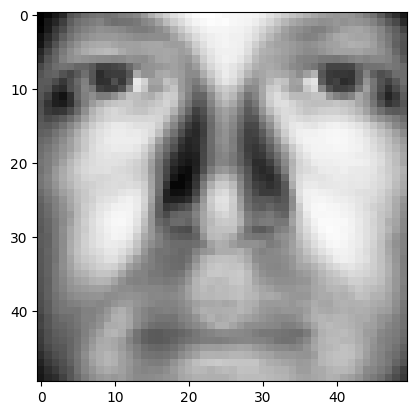

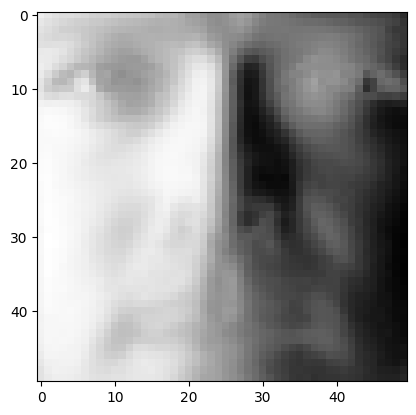

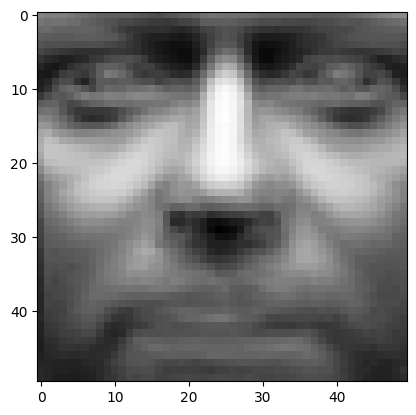

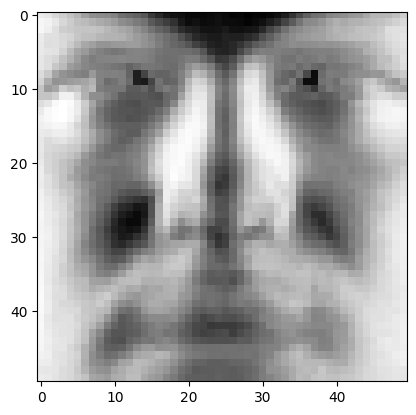

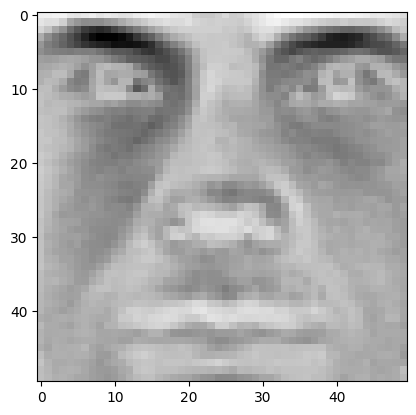

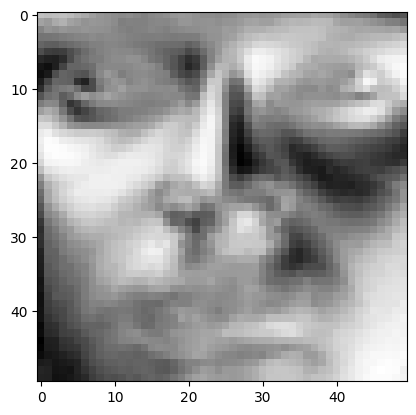

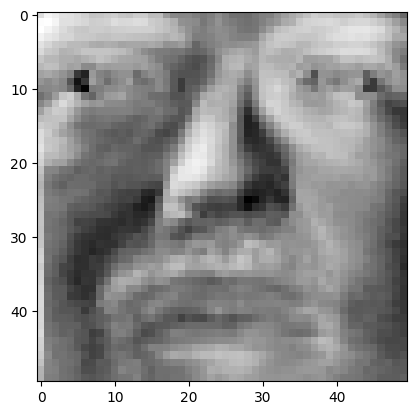

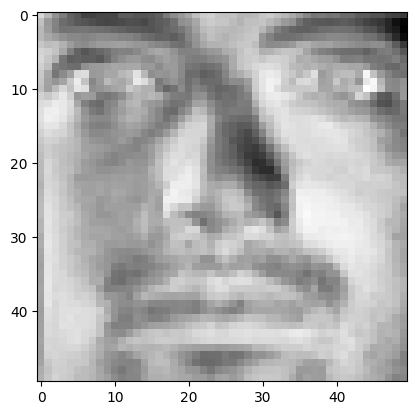

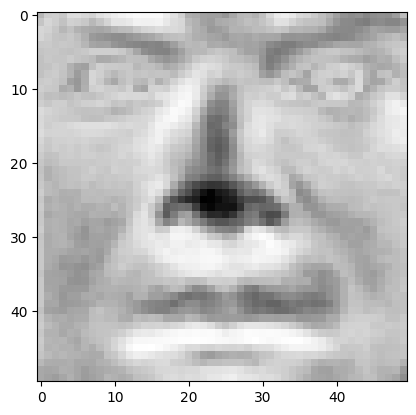

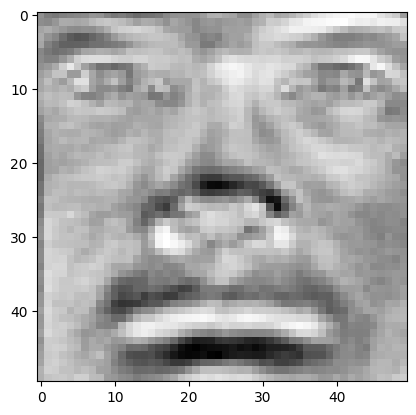

In [5]:
# Finding the eigenface through performing eigendecomposition.

# Code borrowed from lecture 10 notes 
X = train_data
Sigma = X.T.dot(X) / X.shape[0] # form covariance matrix
L, Q = np.linalg.eig(Sigma) # perform eigendecomposition
W = Q[:,:10] # get top 10 eigenvectors | Q = eigenvectors, L = eigenvalues

for i in range(10):
    plt.imshow(W[:,i].real.reshape(50,50), cmap = cm.Greys_r) # Convert to real numbers
    plt.show()

In [6]:
# Write a function to generate r -dimensional feature matrix F and F_test for training images X and test images X_test

def generate_feature_matrix(X, Q, r):
    W = Q.T[:r, :] # get top r eigenvectors and transpose
    F = X.dot(W.T) # transpose W back for dot product
    return F

F = generate_feature_matrix(train_data, Q, 10)
F_test = generate_feature_matrix(test_data, Q, 10)

print(F.shape, F_test.shape)
print(train_data.shape, test_data.shape)

(540, 10) (100, 10)
(540, 2500) (100, 2500)


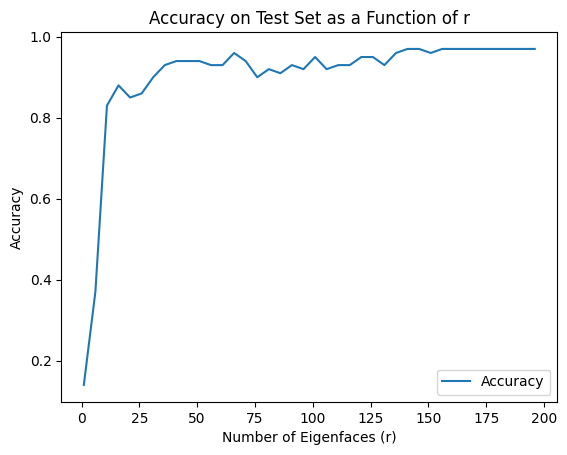

In [39]:
# Performing logistic regression on the feature matrix F and F_test using r = 10
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

our_log_reg = OneVsRestClassifier(LogisticRegression(max_iter=10000))

# Plot the accuracy on the test set as a function of r, where r = 1, 2, 3, ..., 200
accuracy = []
for r in range(1, 201, 5):
    F = generate_feature_matrix(train_data, Q, r)
    F_test = generate_feature_matrix(test_data, Q, r)
    F = np.real(F) 
    F_test = np.real(F_test)
    our_log_reg.fit(F, train_labels)
    test_labels_pred = our_log_reg.predict(F_test)
    accuracy.append(accuracy_score(test_labels, test_labels_pred, normalize=True))

plt.plot(range(1, 201, 5), accuracy, label='Accuracy')
plt.xlabel('Number of Eigenfaces (r)')
plt.ylabel('Accuracy')
plt.title('Accuracy on Test Set as a Function of r')
plt.legend()
plt.show()


/var/folders/64/5mk6k2xn1cqdc7q4cbgh5hzc0000gn/T/ipykernel_5850/2889006575.py:11: ComplexWarning: Casting complex values to real discards the imaginary part
  f_distance = math.sqrt(np.trace((X-F_approx).T.dot(X-F_approx)))


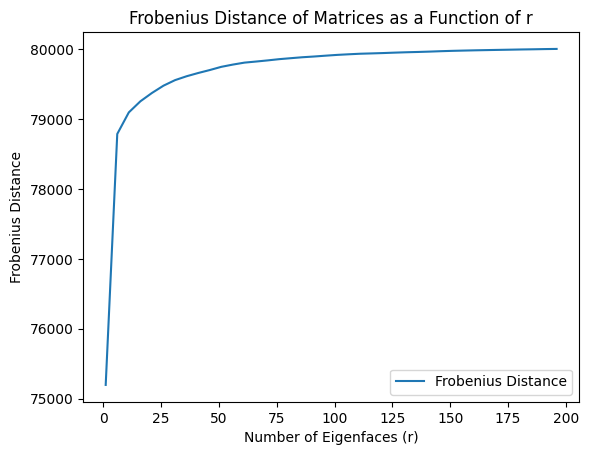

In [21]:
# Low-rank data loss. Constructing approximations of original feature matrices and plotting the average Frobenius distance
# between the original and approximated feature matrices as a function of r

import math

frobenius = []
for r in range(1, 201, 5):
    F = generate_feature_matrix(train_data, Q, r)
    F = np.real(F)
    F_approx = F.dot(Q[:r, :])
    f_distance = math.sqrt(np.trace((X-F_approx).T.dot(X-F_approx)))
    frobenius.append(f_distance)

plt.plot(range(1, 201, 5), frobenius, label='Frobenius Distance')
plt.xlabel('Number of Eigenfaces (r)')
plt.ylabel('Frobenius Distance')
plt.title('Frobenius Distance of Matrices as a Function of r')
plt.legend()
plt.show()